In [1]:
#import packages and initialize settings
import os
import numpy as np
from astropy.io import fits
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table
from astropy.io import ascii
from reproject import reproject_interp

plt.rc('text',usetex=True)
fontsize=20
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']="white"

import sys
sys.path.append('/home/mayker.1/Desktop/NessPythonFunctions')

In [2]:
# Get SNeCO information
database = Table.read('../Data/3.SNe+GalData.csv', format = "csv")

database[0:1]

<Table length=1>
 galaxy  ...
  str8   ...
-------- ...
circinus ...

<ipython-input-3-a2983478c077>:10: RuntimeWarning: invalid value encountered in log10
  logmap = np.log10(map)


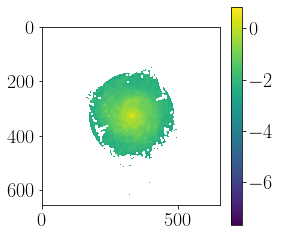

In [3]:
galaxies = np.array(database["galaxy"], dtype='object')
SNe = np.array(database["SN_name"], dtype='object')


#fileName = "/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/irac/ngc0628_irac1_1kpc.fits"
fileName = "/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/irac/ngc0628_irac1_gauss7p5.fits"
hdulist = pyfits.open(fileName)
map = hdulist[0].data
#wcs = WCS(hdulist[0].header, naxis=2)
logmap = np.log10(map)
plt.figure(figsize = (4,4))
plt.imshow(logmap, cmap='viridis')
plt.colorbar()


In [8]:
# generate list of galaxies in IRAC sample 

fileList = []

for i in range(len(galaxies)):
    if galaxies[i] == "circinus":
        galaxies[i] = "eso097-013"
    fileCheck = "/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/irac/" + galaxies[i] + "_irac1_gauss7p5.fits"
    if os.path.isfile(fileCheck) == False:
        fileCheck = "/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/z0mgs/" + galaxies[i] + "_w1_gauss7p5.fits"
        if os.path.isfile(fileCheck) == False:
            fileCheck = "No IRAC or WISE File for " + galaxies[i] + "."
    else: pass
    fileList.append(fileCheck)
    

In [9]:
# for i in range(len(fileList)):
#     print(fileList[i])

Missing IRAC files for Circinus, NGC2997, NGC4945, NGC5128, NGC5530, NGC6744
Wise files available in ZOMGS directory

What resolution is this map: 7p5 arcsec

"IRAC is a four-channel camera that provides simultaneous 5.2 x 5.2 arcmin images at 3.6, 4.5, 5.8, and 8 microns (the black instrument in the lower right part of the above image; see the optical housing model and the conceptual layout diagram. The pixel size is 1.22 arcsec in all bands. "

In [10]:
# Next apply clipping to match field of coverage
# coverage file:  "/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/irac/" + galaxies[i] + "_irac1_cov_gauss7p5.fits"
# use reproject_interp and project IRAC onto the PHANGS one and keep the overlap coverage as the locations that 
# the SNe can occur in 

<ipython-input-11-6064ef8564d4>:13: RuntimeWarning: divide by zero encountered in log10
  logPhangsMap, logIracMap = np.log10(phangsMap), np.log10(iracMap)
<ipython-input-11-6064ef8564d4>:13: RuntimeWarning: invalid value encountered in log10
  logPhangsMap, logIracMap = np.log10(phangsMap), np.log10(iracMap)


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
No phangs 150pc file

<ipython-input-11-6064ef8564d4>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(nrows = 1, ncols = 3, sharex = False, sharey = True, figsize = (9,4.5))


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
No phangs 150pc file

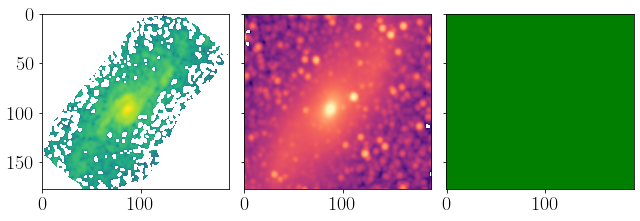

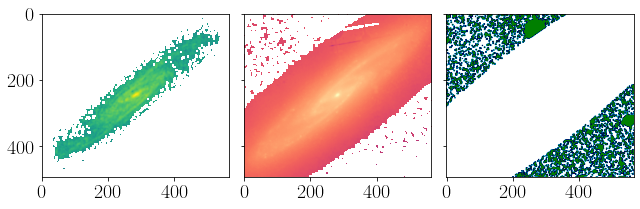

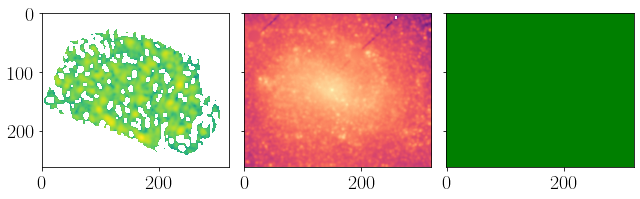

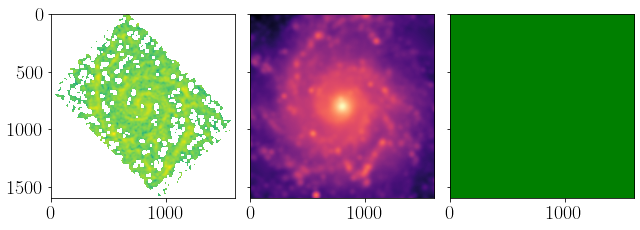

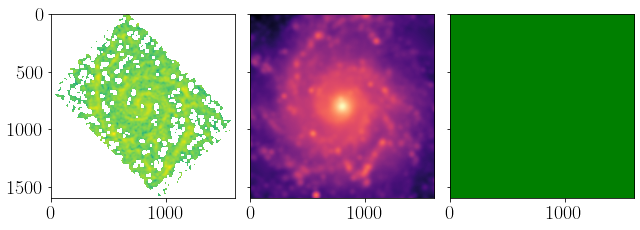

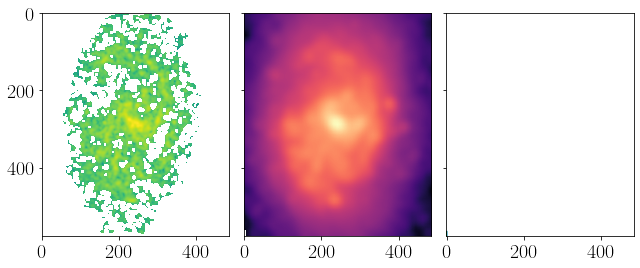

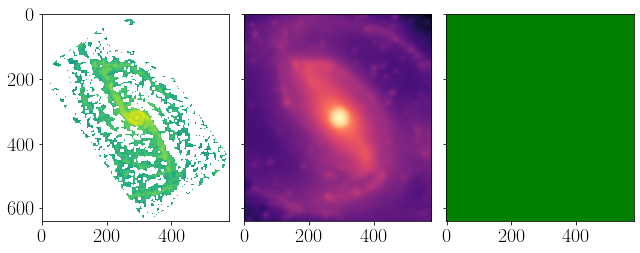

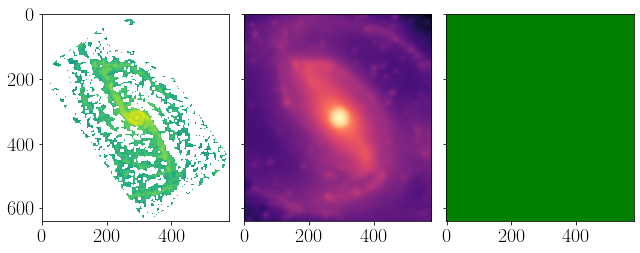

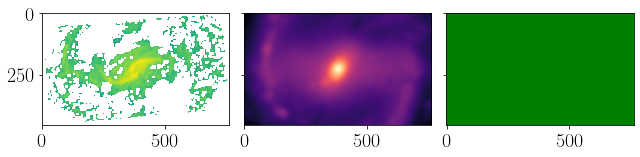

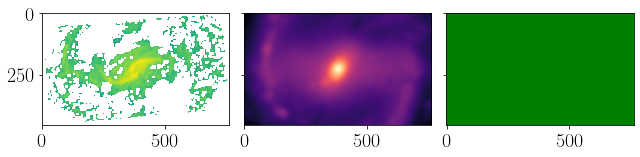

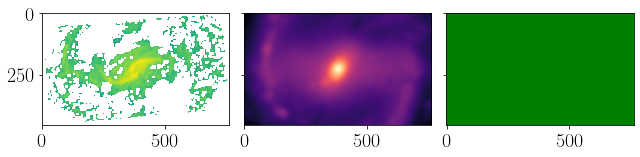

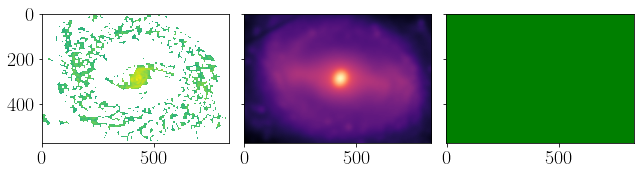

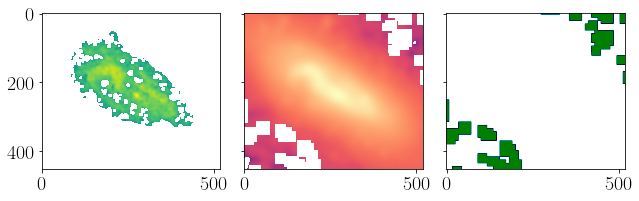

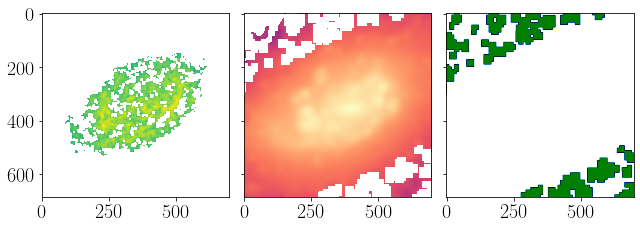

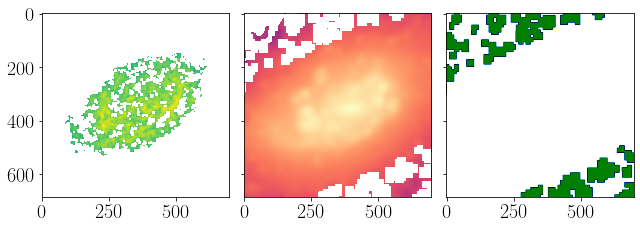

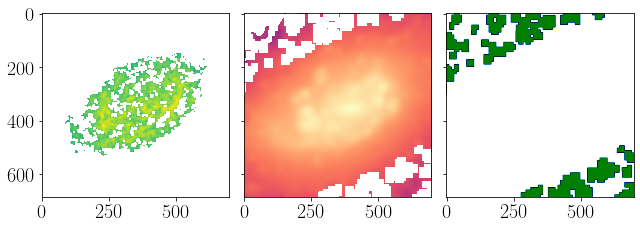

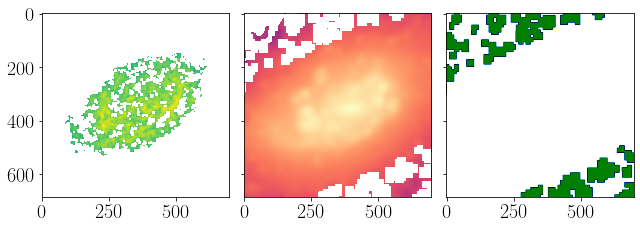

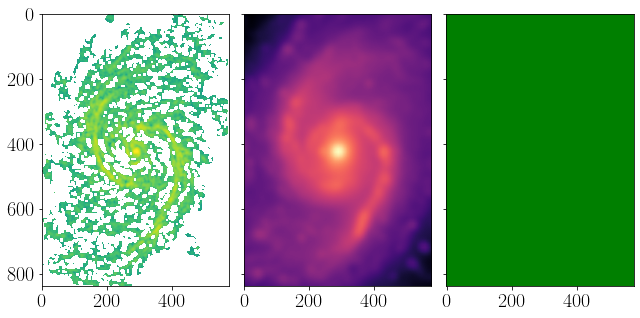

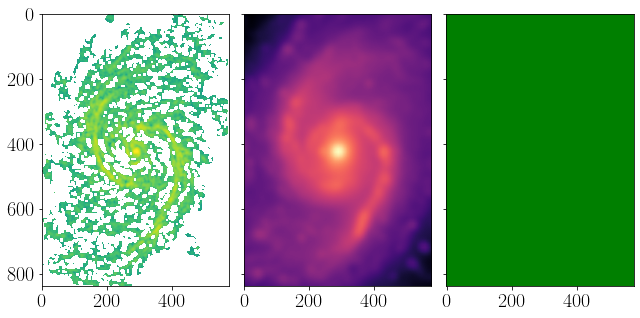

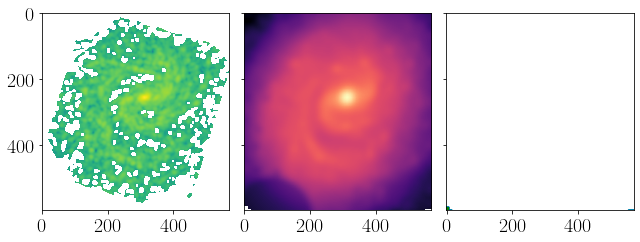

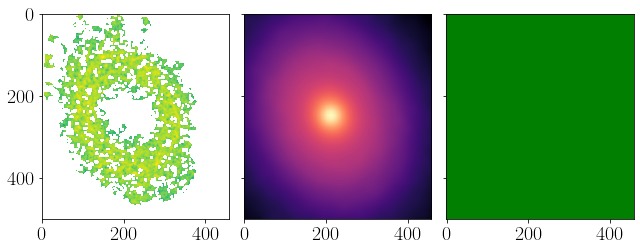

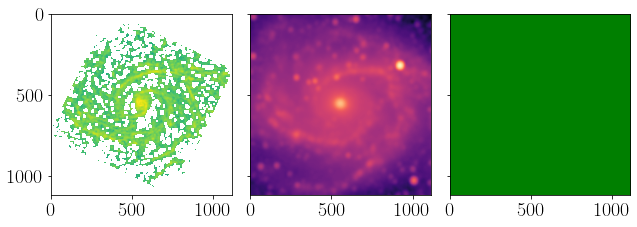

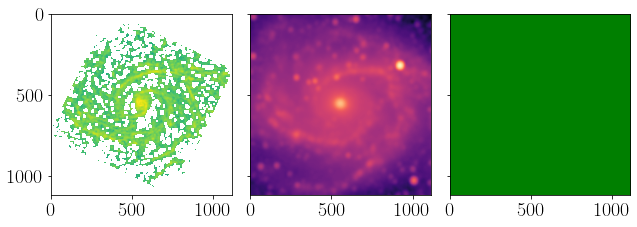

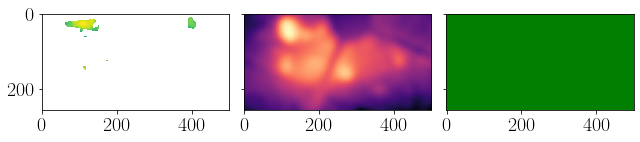

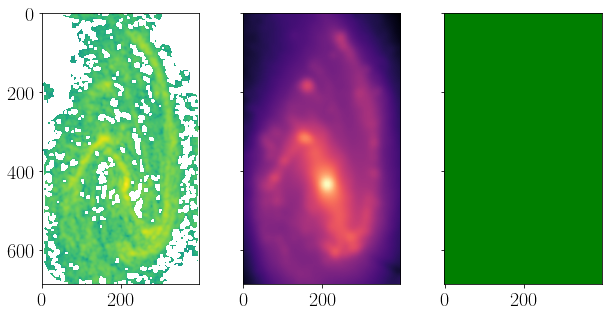

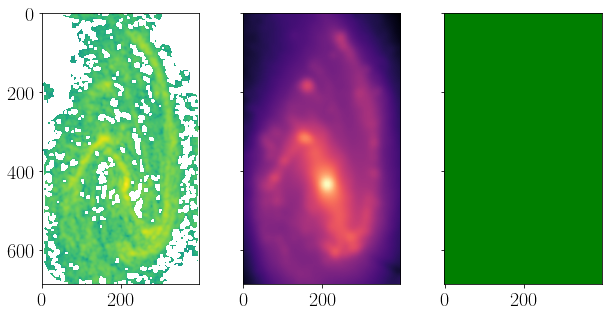

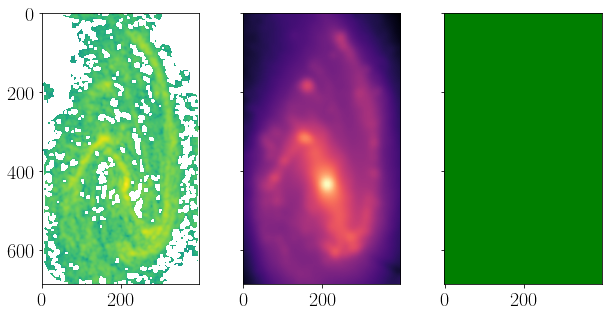

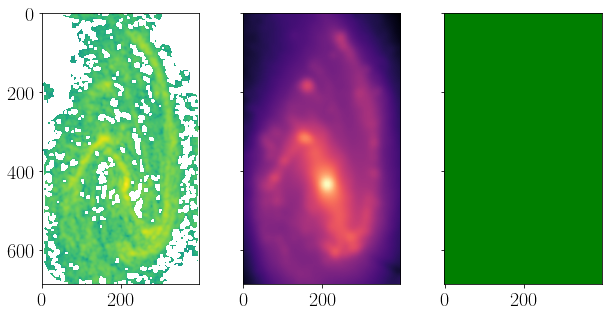

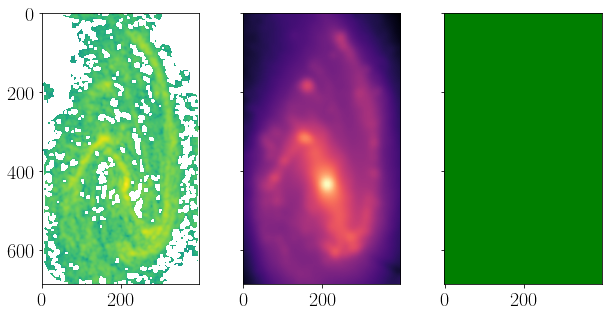

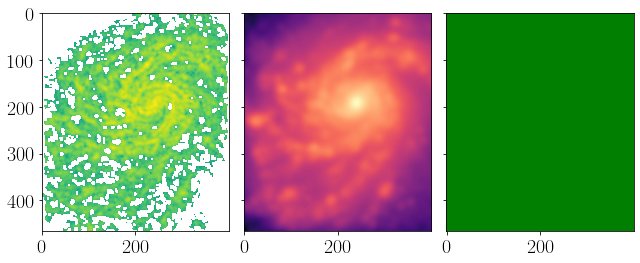

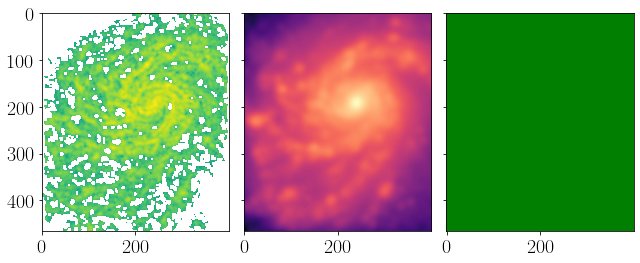

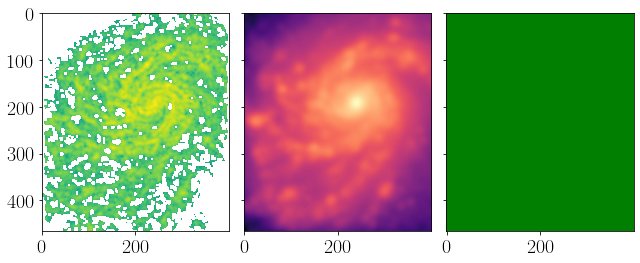

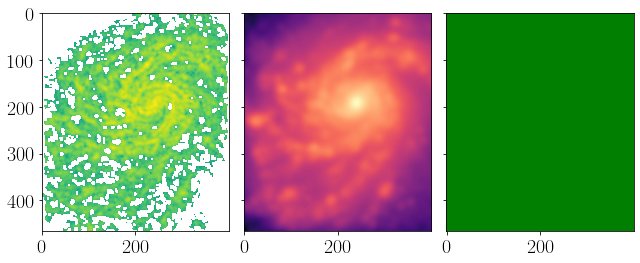

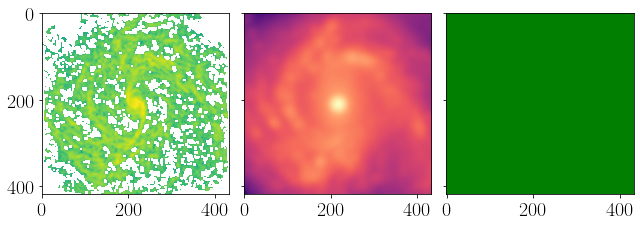

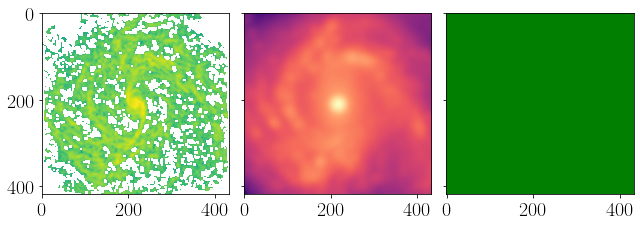

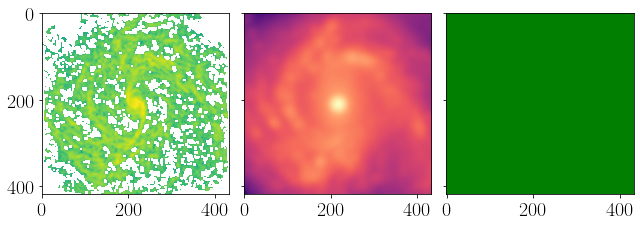

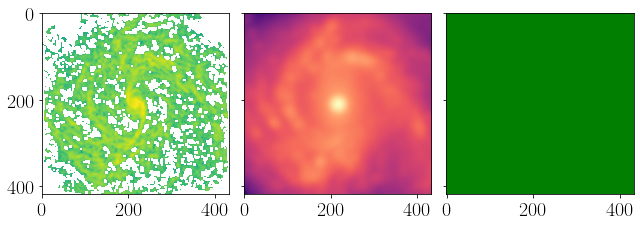

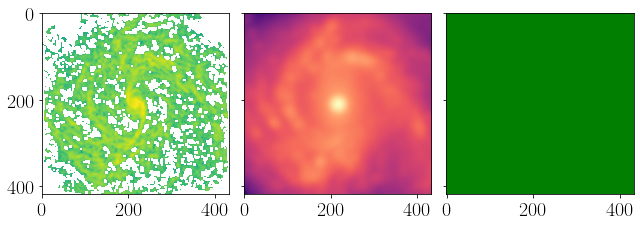

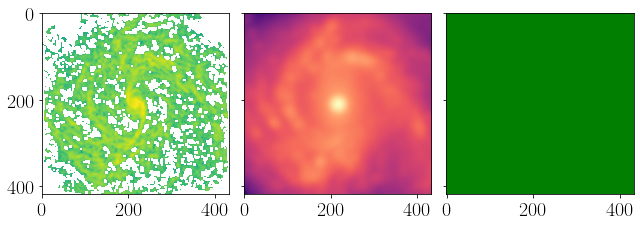

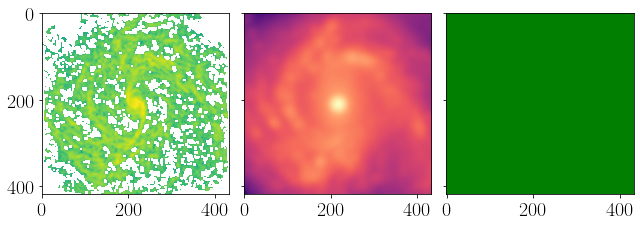

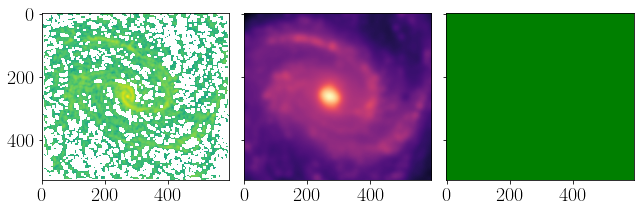

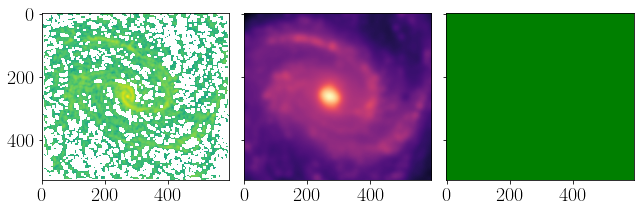

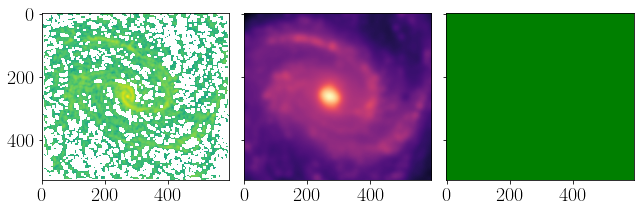

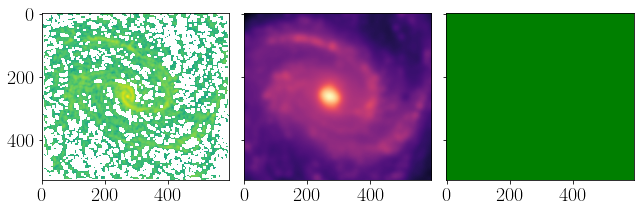

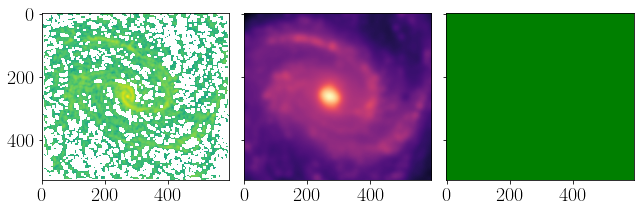

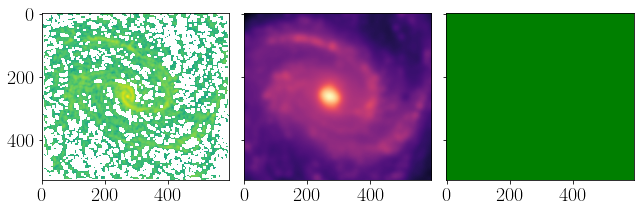

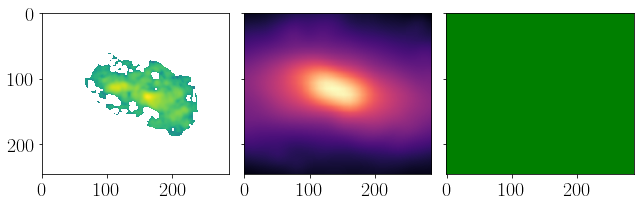

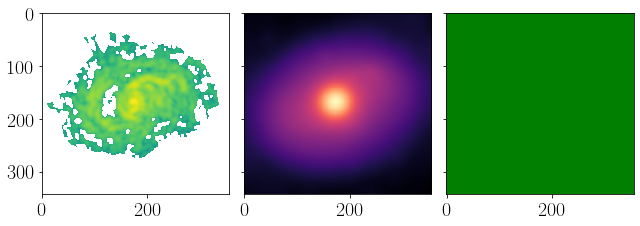

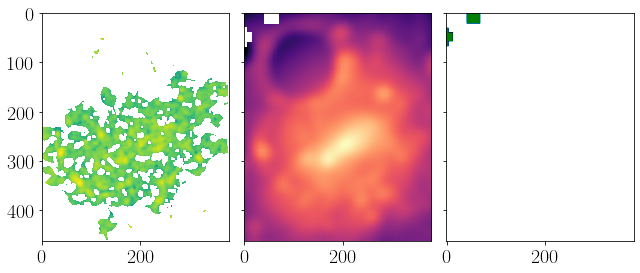

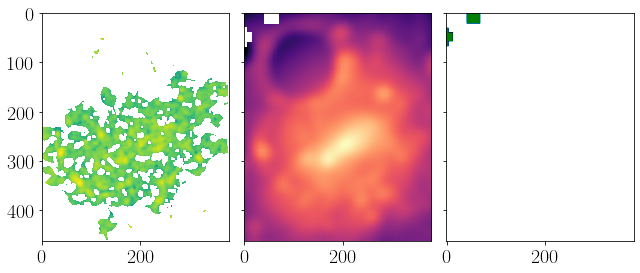

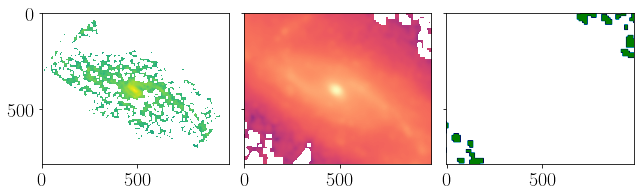

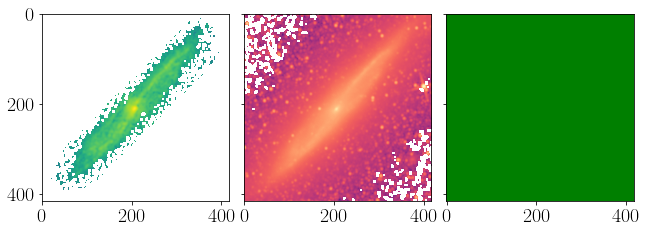

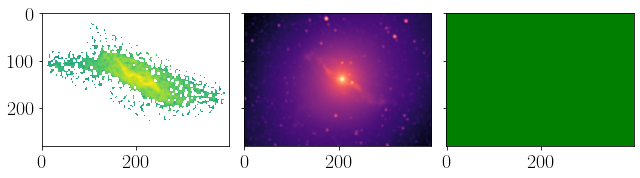

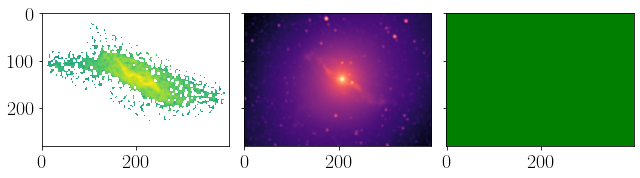

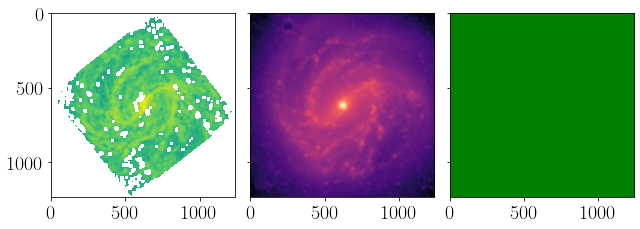

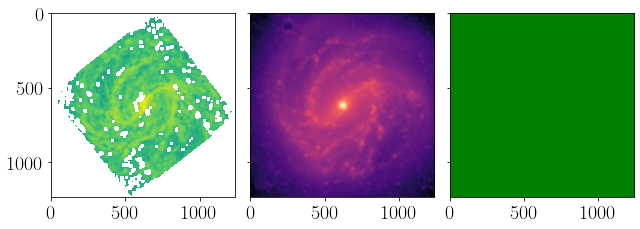

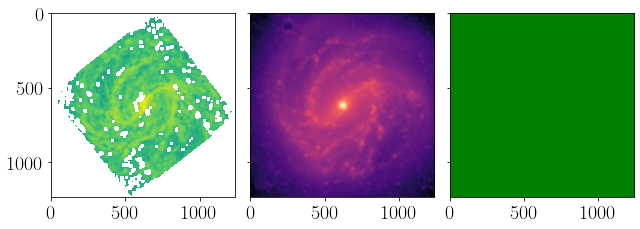

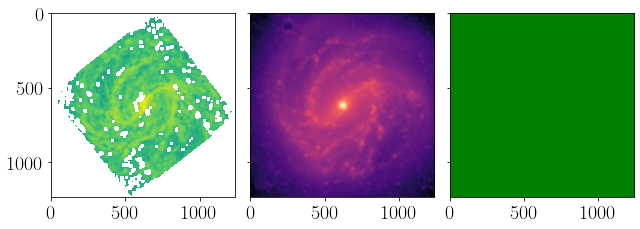

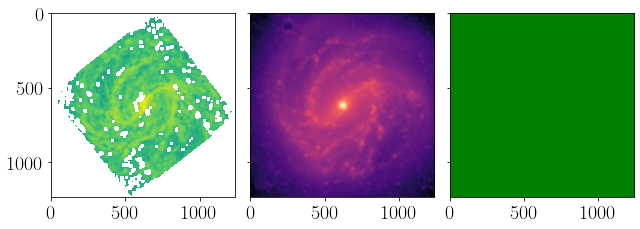

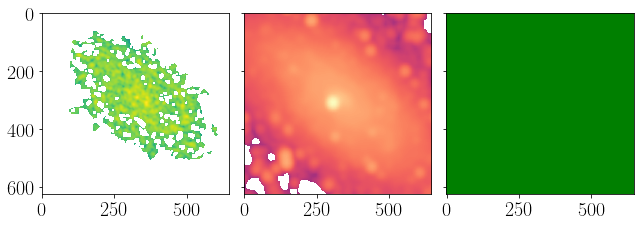

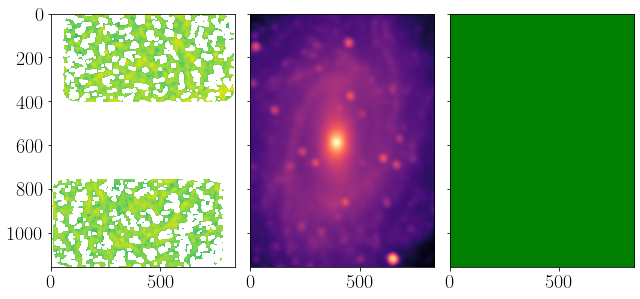

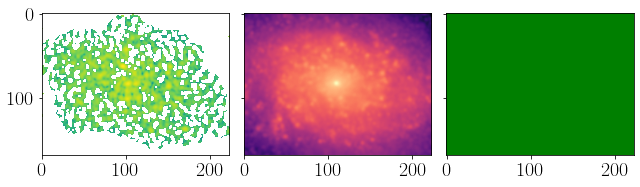

In [11]:
# plot multiwavelength comparison images

for i in range(len(database)):

    phangsFile = database["ImageFile150"][i]

    if os.path.isfile(phangsFile):
        iracFile = fileList[i]
        hdu_phangs = pyfits.open(phangsFile)
        hdu_irac   = pyfits.open(iracFile)
        phangsMap  = hdu_phangs[0].data
        iracMap, footprint = reproject_interp(hdu_irac, hdu_phangs[0].header) 
        logPhangsMap, logIracMap = np.log10(phangsMap), np.log10(iracMap)

        f, ax = plt.subplots(nrows = 1, ncols = 3, sharex = False, sharey = True, figsize = (9,4.5))
        ax[0].imshow(logPhangsMap, cmap='viridis')
        ax[1].imshow(logIracMap, cmap='magma')
        ax[2].imshow(footprint, cmap='ocean')
        plt.tight_layout()
        f.savefig("../Figures/3.MultiWavelengthImages/" + galaxies[i] + "_" + SNe[i] + ".png", transparent = False)
        
    else:
        print("No phangs 150pc file")
